In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
plt.rc('figure', figsize=(10, 10))
df = pd.read_csv('data/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Analyze What range of Height and Weight has more chance to win a Medal in Olympic (By Sex,Age,Year,Season)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [139]:
dfmedal=df[['Sex','Age','Height','Weight','Year','Season','Medal']] #check medal player with height and weight records
dfall=df[['Sex','Age','Height','Weight','Year','Season']]
dfmedal=dfmedal.dropna()
dfmedal.describe()

,Age,Height,Weight,Year
count,30181.000000,30181.000000,30181.000000,30181.000000
mean,25.429012,177.642358,73.753554,1988.005964
std,5.049684,10.924188,15.004992,22.718451
min,13.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,63.000000,1976.000000
50%,25.000000,178.000000,73.000000,1992.000000
75%,28.000000,185.000000,83.000000,2006.000000
max,66.000000,223.000000,182.000000,2016.000000


In [140]:
dfall=dfall.dropna()
dfall.describe()

,Age,Height,Weight,Year
count,206165.000000,206165.000000,206165.000000,206165.000000
mean,25.055509,175.371950,70.688337,1989.674678
std,5.483096,10.546088,14.340338,20.130865
min,11.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1976.000000
50%,24.000000,175.000000,70.000000,1992.000000
75%,28.000000,183.000000,79.000000,2006.000000
max,71.000000,226.000000,214.000000,2016.000000


# Calculate BMI

In [141]:
dfmedal['BMI']=round(dfmedal.Weight/(dfmedal.Height*dfmedal.Height/10000),2)

In [142]:
dfall['BMI']=round(dfall['Weight']/(dfall['Height']*dfall['Height']/10000),2)

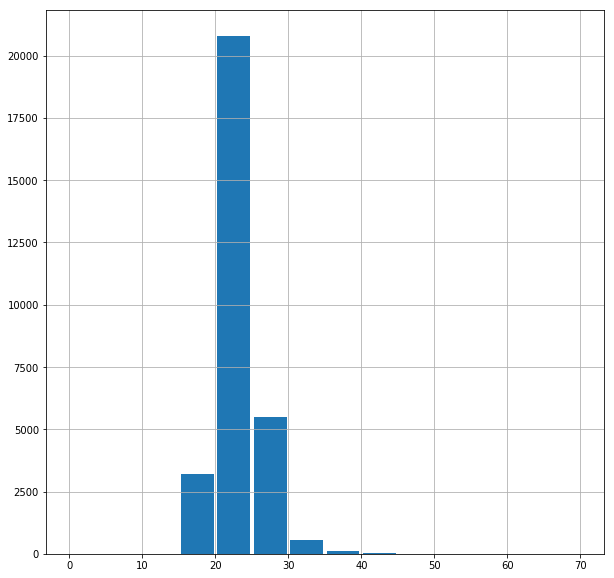

In [164]:
[0,2.5,5,10,12.5,15,1,35,40,45,50,55,60,65,70]
dfmedal.BMI.hist(bins=,rwidth=0.9)

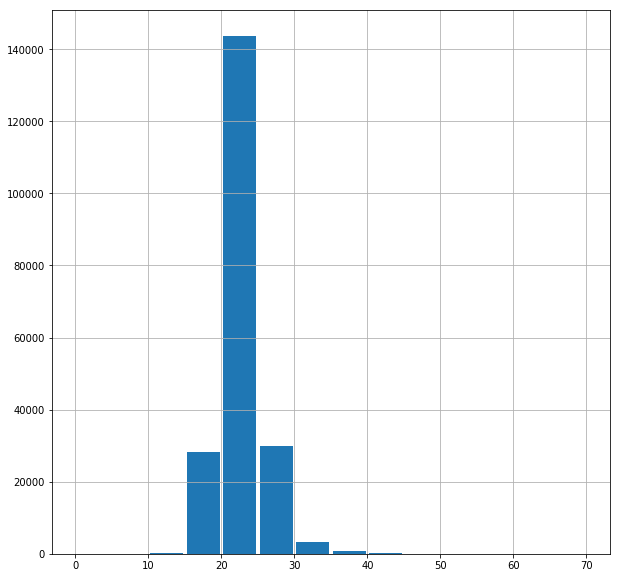

In [162]:
dfall.BMI.hist(bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70],rwidth=0.9)

In [143]:
dfall.describe()

,Age,Height,Weight,Year,BMI
count,206165.000000,206165.000000,206165.000000,206165.000000,206165.000000
mean,25.055509,175.371950,70.688337,1989.674678,22.784372
std,5.483096,10.546088,14.340338,20.130865,2.912065
min,11.000000,127.000000,25.000000,1896.000000,8.360000
25%,21.000000,168.000000,60.000000,1976.000000,20.960000
50%,24.000000,175.000000,70.000000,1992.000000,22.530000
75%,28.000000,183.000000,79.000000,2006.000000,24.210000
max,71.000000,226.000000,214.000000,2016.000000,63.900000


In [144]:
dfmedal.describe()

,Age,Height,Weight,Year,BMI
count,30181.000000,30181.000000,30181.000000,30181.000000,30181.000000
mean,25.429012,177.642358,73.753554,1988.005964,23.164632
std,5.049684,10.924188,15.004992,22.718451,2.959203
min,13.000000,136.000000,28.000000,1896.000000,13.490000
25%,22.000000,170.000000,63.000000,1976.000000,21.300000
50%,25.000000,178.000000,73.000000,1992.000000,22.930000
75%,28.000000,185.000000,83.000000,2006.000000,24.640000
max,66.000000,223.000000,182.000000,2016.000000,56.500000


## By Sex

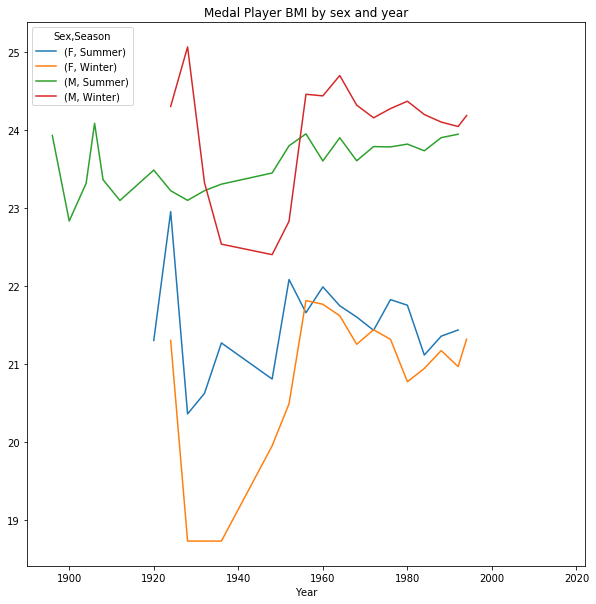

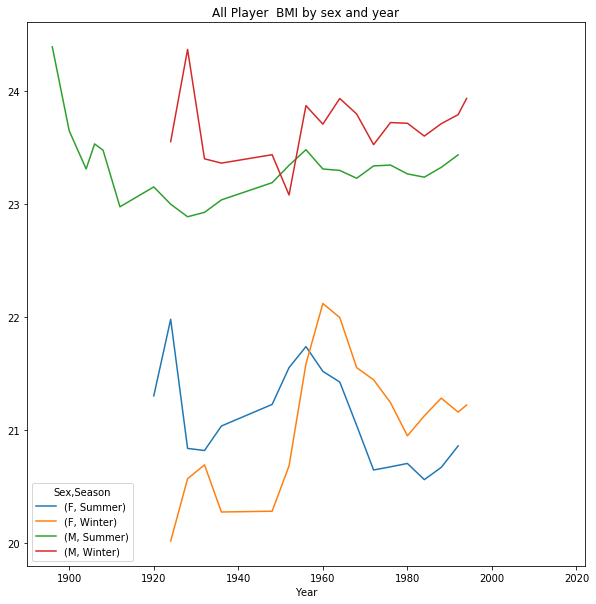

In [145]:
sex = dfmedal.pivot_table('BMI', index='Year',
                                 columns=['Sex','Season'])
sex.tail()
sex.plot(title='Medal Player BMI by sex and year')
sex1 = dfall.pivot_table('BMI', index='Year',
                                 columns=['Sex','Season'])
sex1.tail()
sex1.plot(title='All Player  BMI by sex and year')

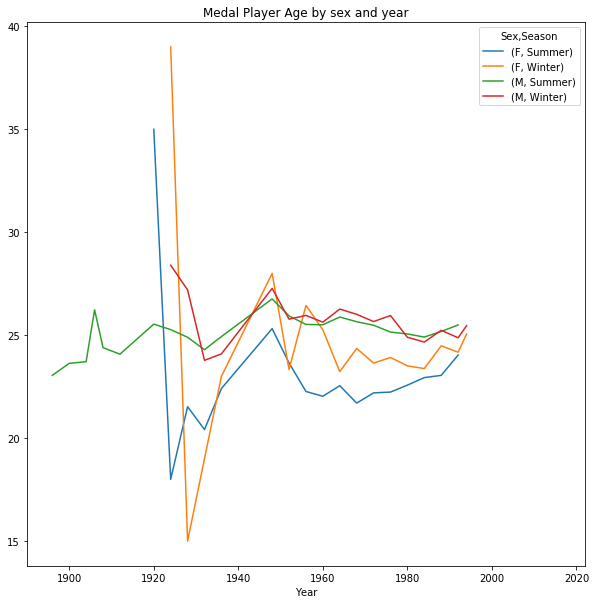

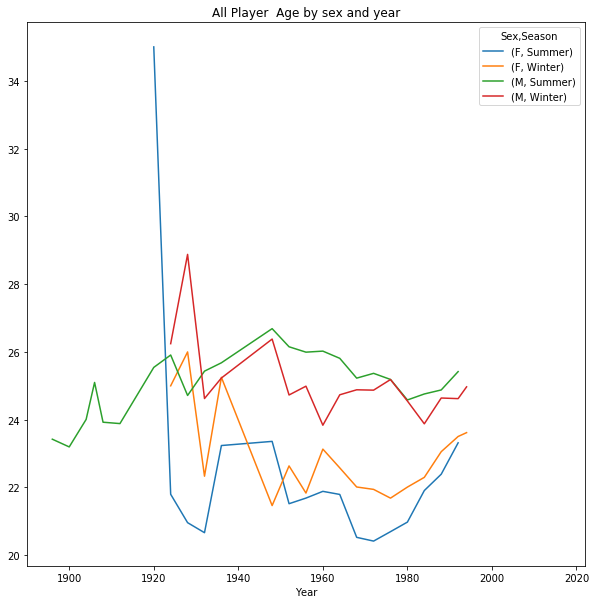

In [151]:
age = dfmedal.pivot_table('Age', index='Year',
                                 columns=['Sex','Season'])
age.tail()
age.plot(title='Medal Player Age by sex and year')
age1 = dfall.pivot_table('Age', index='Year',
                                 columns=['Sex','Season'])
age1.tail()
age1.plot(title='All Player  Age by sex and year')

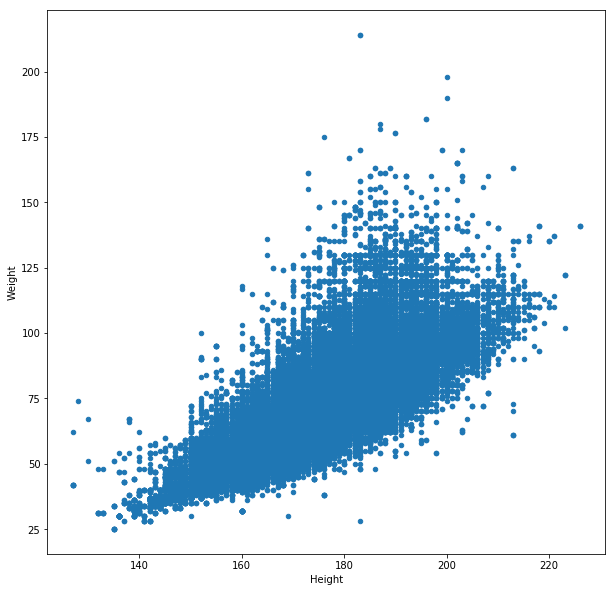

In [147]:
ax1 = dfall.plot.scatter(x='Height',y='Weight')

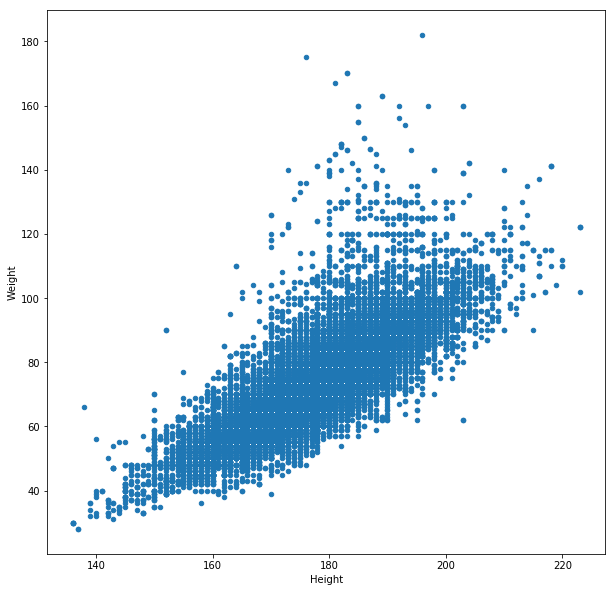

In [149]:
ax2 = dfmedal.plot.scatter(x='Height',y='Weight')

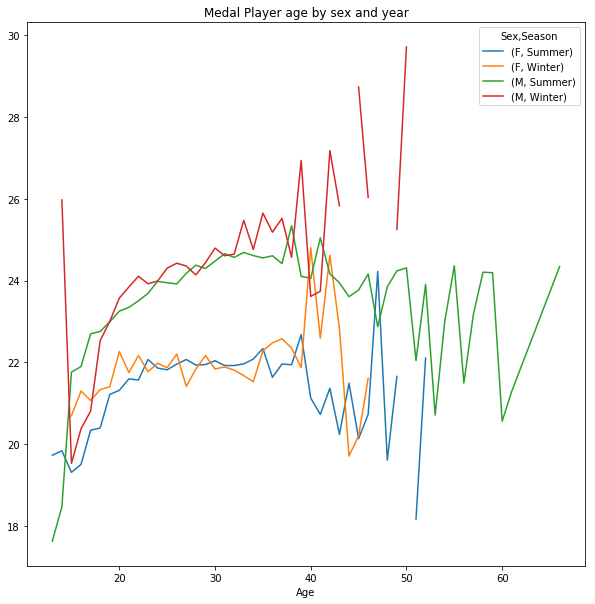

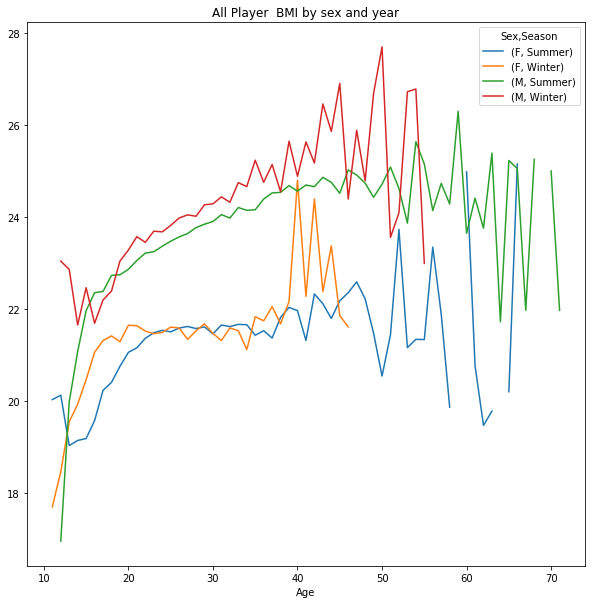

In [150]:
bmiage = dfmedal.pivot_table('BMI', index='Age',
                                 columns=['Sex','Season'])
bmiage.tail()
bmiage.plot(title='Medal Player age by sex and year')
bmiage1 = dfall.pivot_table('BMI', index='Age',
                                 columns=['Sex','Season'])
bmiage1.tail()
bmiage1.plot(title='All Player  BMI by sex and year')